chi2_dist_12: 34.1190
chi2_dist_13: 428.0760


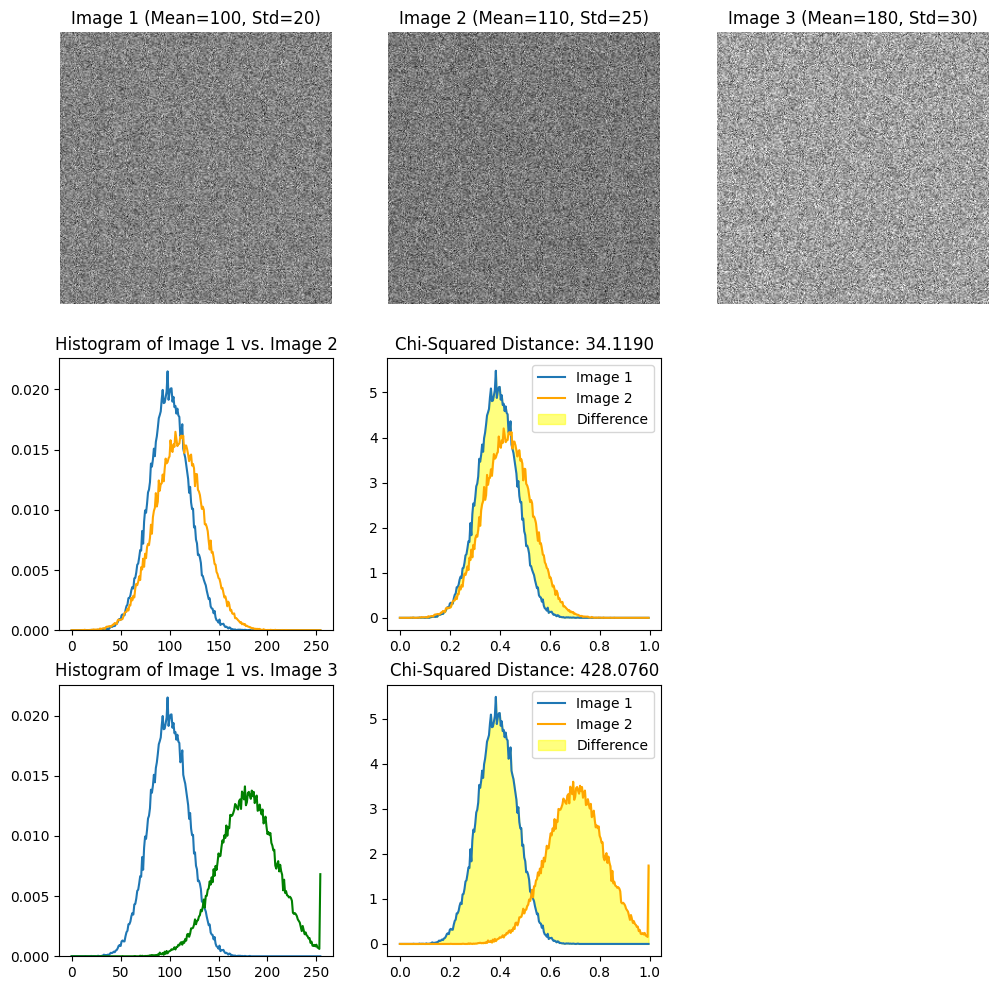

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def chi_squared_distance(p, q):
    """
    Compute the Chi-Squared Distance between two distributions p and q.
    Both p and q should be normalized histograms (sum to 1).
    """
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-10
    p = np.clip(p, epsilon, None)
    q = np.clip(q, epsilon, None)
    return np.sum((p - q)**2 / (p + q))

def chi_squared_histogram(img1, img2, plt_idx):
    """
    Plot histograms of two images and calculate the Chi-Squared Distance.
    """
    img1_h = img1.copy() / 255.0
    img2_h = img2.copy() / 255.0

    # Compute histograms
    h1, bins1 = np.histogram(img1_h.flatten(), bins=255, range=(0., 1.), density=True)
    h2, bins2 = np.histogram(img2_h.flatten(), bins=255, range=(0., 1.), density=True)

    # Calculate Chi-Squared Distance
    chi2_dist = chi_squared_distance(h1, h2)

    # Plot the histograms
    plt.subplot(3, 3, plt_idx)
    plt.plot(bins1[:-1], h1, label="Image 1")
    plt.plot(bins2[:-1], h2, label="Image 2", color='orange')
    plt.fill_between(bins1[:-1], h1, h2, color='yellow', alpha=0.5, label='Difference')
    plt.legend()
    
    plt.title(f"Chi-Squared Distance: {chi2_dist:.4f}")
    return chi2_dist

# Function to generate an image with Gaussian noise
def generate_gaussian_image(mean, std, size=(256, 256)):
    """Generate an image with Gaussian noise."""
    return np.clip(np.random.normal(mean, std, size), 0, 255).astype(np.uint8)

# Generate three images
image1 = generate_gaussian_image(mean=100, std=20)  # Image 1: Gaussian (mean=100, std=20)
image2 = generate_gaussian_image(mean=110, std=25)  # Image 2: Gaussian (mean=110, std=25)
image3 = generate_gaussian_image(mean=180, std=30)  # Image 3: Gaussian (mean=180, std=30)

# Plot the images
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1 (Mean=100, Std=20)")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2 (Mean=110, Std=25)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(image3, cmap='gray')
plt.title("Image 3 (Mean=180, Std=30)")
plt.axis('off')

# Plot the histograms and compute Chi-Squared Distances
bins = np.linspace(0., 255., 256)
h1_normed = np.histogram(image1.flatten(), bins=bins, density=True)[0]
h2_normed = np.histogram(image2.flatten(), bins=bins, density=True)[0]
h3_normed = np.histogram(image3.flatten(), bins=bins, density=True)[0]

plt.subplot(3, 3, 4)
plt.plot(bins[:-1], h1_normed, label="Image 1")
plt.plot(bins[:-1], h2_normed, label="Image 2", color='orange')
plt.title("Histogram of Image 1 vs. Image 2")
y_max = max(np.max(h1_normed), np.max(h2_normed))
y_min = min(np.min(h1_normed), np.min(h2_normed))
plt.ylim(y_min - y_min * .05 , y_max + y_max * .05)

plt.subplot(3, 3, 7)
plt.plot(bins[:-1], h1_normed, label="Image 1")
plt.plot(bins[:-1], h3_normed, label="Image 3", color='green')
y_max = max(np.max(h1_normed), np.max(h3_normed))
y_min = min(np.min(h1_normed), np.min(h3_normed))
plt.ylim(y_min - y_min * .05 , y_max + y_max * .05)
plt.title("Histogram of Image 1 vs. Image 3")

chi2_dist_12 = chi_squared_histogram(image1,image2 ,5)
chi2_dist_13 = chi_squared_histogram(image1,image3 ,8)

print(f"chi2_dist_12: {chi2_dist_12:.4f}")
print(f"chi2_dist_13: {chi2_dist_13:.4f}")
